# Exercise 2 - Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate the data

In [2]:
a = 5
b = 10

f = lambda x: a * x + b

In [3]:
n = 100
spread = 10

x = np.random.uniform(1, 10, n)
y = f(x) + np.random.normal(0.0, spread, n)

### Plot the data

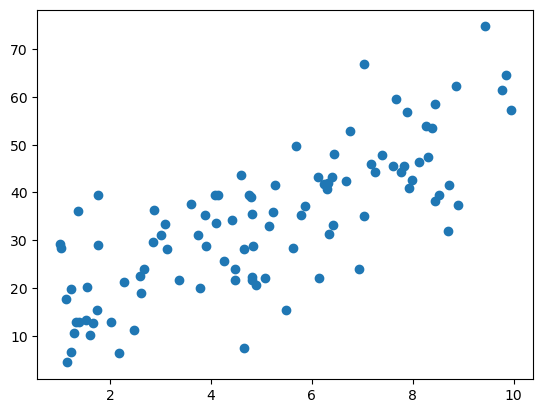

In [4]:
plt.scatter(x, y)
plt.show()

### Determine linear regression line

In [5]:
model = np.polynomial.Polynomial.fit(x, y, deg = 1).convert()
model.coef

array([10.84914966,  4.54810456])

### of met de polyfit en poly1d functies

In [6]:
coefs = np.polyfit(x, y, deg = 1)
model = np.poly1d(coefs)
model.coefficients

array([ 4.54810456, 10.84914966])

### Plot with regression line

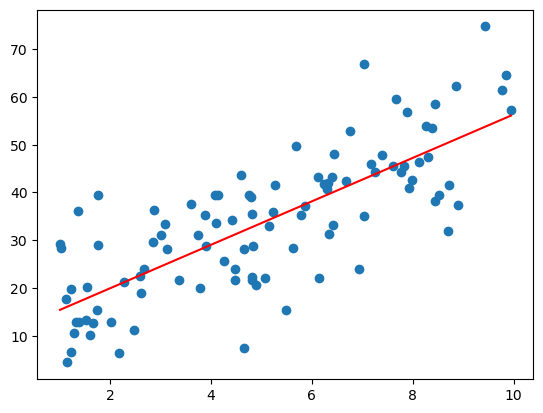

In [7]:
plt.scatter(x, y)
x_plot = np.linspace(np.min(x), np.max(x), 100)
y_plot = model(x_plot)
plt.plot(x_plot, y_plot, color='red')
plt.show()

### Metrics

#### Root Mean Squared Error

In [8]:
rmse = np.mean((y - model(x)) ** 2) ** 0.5
rmse

np.float64(9.386817863578878)

In [9]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y, model(x))
rmse

9.386817863578878

#### Mean Absolute Error

In [10]:
mae = np.mean(np.abs(y - model(x)))
mae

np.float64(7.502656953771016)

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, model(x))
mae

7.502656953771016

#### Coefficient of Determination - R-squared

In [12]:
r_squared = 1 - np.sum((y - model(x)) ** 2) / np.sum((y - np.mean(y)) ** 2)
r_squared

np.float64(0.5998247361634648)

In [13]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, model(x))
r_squared

0.5998247361634648

### Higher Order Polynomial Regression 

In [24]:
deg = 13

model = np.polynomial.Polynomial.fit(x, y, deg = deg).convert()
    
rmse = root_mean_squared_error(y, model(x))
mae = mean_absolute_error(y, model(x))
r_squared = r2_score(y, model(x))    

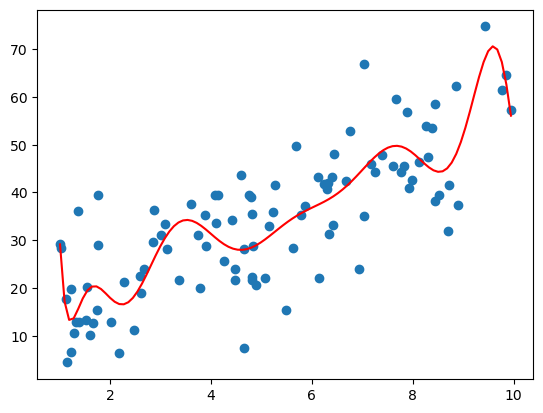

In [25]:
plt.scatter(x, y)
x_plot = np.linspace(np.min(x), np.max(x), 100)
y_plot = model(x_plot)
plt.plot(x_plot, y_plot, color='red')
plt.show()

### Test data set

In [26]:
n = 1000
spread = 10

x_test = np.random.uniform(1, 10, n)
y_test = f(x_test) + np.random.normal(0.0, spread, n)

In [27]:
metric = r2_score

degrees = range(1, 18)
metric_train = []
metric_test = []

for deg in degrees:
    model = np.polynomial.Polynomial.fit(x, y, deg = deg).convert()
    metric_train.append( metric(y, model(x)) )
    metric_test.append( metric(y_test, model(x_test)) )    

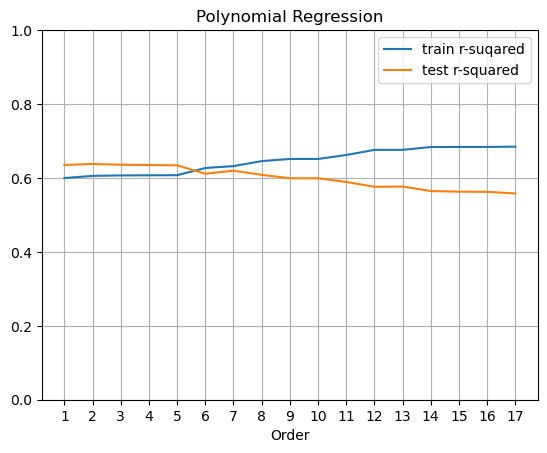

In [28]:
plt.plot(degrees, metric_train, label='train r-suqared')
plt.plot(degrees, metric_test, label='test r-squared')
plt.xticks(degrees)
plt.ylim((0.0, 1.0))
plt.title('Polynomial Regression')
plt.xlabel('Order')
plt.legend()
plt.grid()
plt.show()